In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
# Paths for data.
Ravdess = r"C:\Users\DELL\Downloads\ravdess"
Crema = r"C:\Users\DELL\Downloads\cremad\AudioWAV"
Tess = "C:/Desktop/tess/TESS Toronto emotional speech set data/"
Savee = "C:/Desktop/savee/AudioData/AudioData/"

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
file_emotion = []
file_path = []
file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(os.path.join(Ravdess, dir))
    for file in actor:
        if file.endswith('.wav'):
            part = file.split('.')[0]
            part = part.split('-')
            if len(part) >= 3:  # Safe check
                file_emotion.append(int(part[2]))
                file_path.append(os.path.join(Ravdess, dir, file))
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  C:\Users\DELL\Downloads\ravdess\Actor_01\03-02...
1  neutral  C:\Users\DELL\Downloads\ravdess\Actor_01\03-02...
2  neutral  C:\Users\DELL\Downloads\ravdess\Actor_01\03-02...
3  neutral  C:\Users\DELL\Downloads\ravdess\Actor_01\03-02...
4     calm  C:\Users\DELL\Downloads\ravdess\Actor_01\03-02...

In [4]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    folder_path = os.path.join(Tess, dir)
    if not os.path.isdir(folder_path):
        continue
    files = os.listdir(folder_path)
    for file in files:
        if not file.endswith('.wav'):
            continue
        # Get emotion from folder name
        emotion = dir.split('_')[-1].lower()
        file_emotion.append(emotion)
        file_path.append(os.path.join(folder_path, file))

# Create DataFrame
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)

print(Tess_df.head())


  Emotions                                               Path
0    angry  C:/Desktop/tess/TESS Toronto emotional speech ...
1    angry  C:/Desktop/tess/TESS Toronto emotional speech ...
2    angry  C:/Desktop/tess/TESS Toronto emotional speech ...
3    angry  C:/Desktop/tess/TESS Toronto emotional speech ...
4    angry  C:/Desktop/tess/TESS Toronto emotional speech ...


In [5]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head(1)

Emotions                                               Path
0    angry  C:\Users\DELL\Downloads\cremad\AudioWAV1001_DF...

In [6]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for folder in savee_directory_list:
    if folder == 'Info.txt':  # Skip the Info.txt file
        continue
    folder_path = os.path.join(Savee, folder)
    files = os.listdir(folder_path)
    for file in files:
        if not file.endswith('.wav'):
            continue
        full_path = os.path.join(folder_path, file)
        file_path.append(full_path)
        part = file[:2]  # 'a01', 'd02' etc => first 2 characters matter
        if part[0] == 'a':
            file_emotion.append('angry')
        elif part[0] == 'd':
            file_emotion.append('disgust')
        elif part[0] == 'f':
            file_emotion.append('fear')
        elif part[0] == 'h':
            file_emotion.append('happy')
        elif part[0] == 'n':
            file_emotion.append('neutral')
        elif part[:2] == 'sa':
            file_emotion.append('sad')
        elif part[0] == 's':
            file_emotion.append('surprise')
        else:
            file_emotion.append('unknown')  # fallback safety

# Create DataFrame
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)

print(Savee_df.head())


  Emotions                                             Path
0    angry  C:/Desktop/savee/AudioData/AudioData/DC\a01.wav
1    angry  C:/Desktop/savee/AudioData/AudioData/DC\a02.wav
2    angry  C:/Desktop/savee/AudioData/AudioData/DC\a03.wav
3    angry  C:/Desktop/savee/AudioData/AudioData/DC\a04.wav
4    angry  C:/Desktop/savee/AudioData/AudioData/DC\a05.wav


In [7]:
# creating Dataframe using all the 4 dataframes we created so far.
data_paths = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_paths.to_csv("data_paths.csv",index=False)
data_paths.head()

Emotions                                               Path
0  neutral  C:\Users\DELL\Downloads\ravdess\Actor_01\03-02...
1  neutral  C:\Users\DELL\Downloads\ravdess\Actor_01\03-02...
2  neutral  C:\Users\DELL\Downloads\ravdess\Actor_01\03-02...
3  neutral  C:\Users\DELL\Downloads\ravdess\Actor_01\03-02...
4     calm  C:\Users\DELL\Downloads\ravdess\Actor_01\03-02...

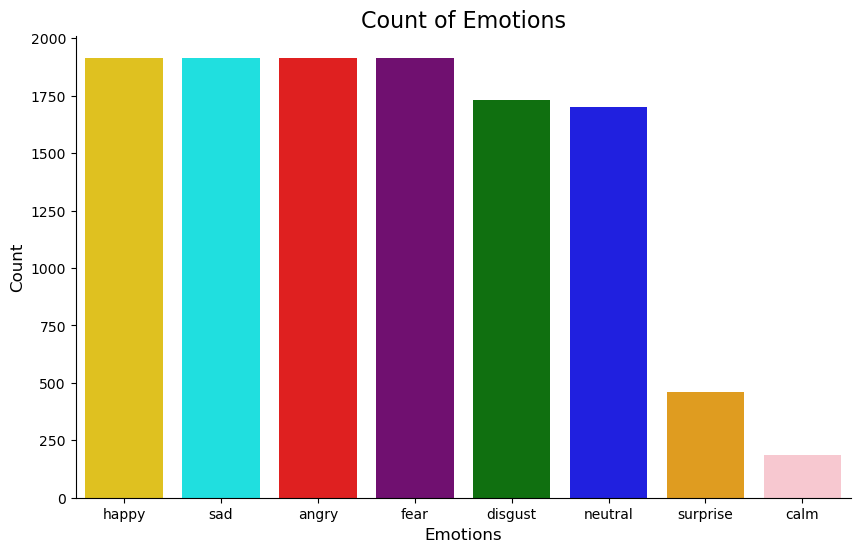

In [8]:
# Fix emotion labels first
data_paths['Emotions'] = data_paths['Emotions'].replace({'surprised':'surprise'})

# Custom color palette for each emotion
emotion_colors = {
    'angry': 'red',
    'disgust': 'green',
    'fear': 'purple',
    'happy': 'gold',
    'neutral': 'blue',
    'sad': 'cyan',
    'surprise': 'orange',
    'calm': 'pink' 
}


# Now plot
plt.figure(figsize=(10,6))
plt.title('Count of Emotions', size=16)
sns.countplot(
    x='Emotions',
    data=data_paths,
    order=data_paths['Emotions'].value_counts().index,
    palette=emotion_colors  # here we set custom colors
)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


In [9]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 2.5))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 2.5))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

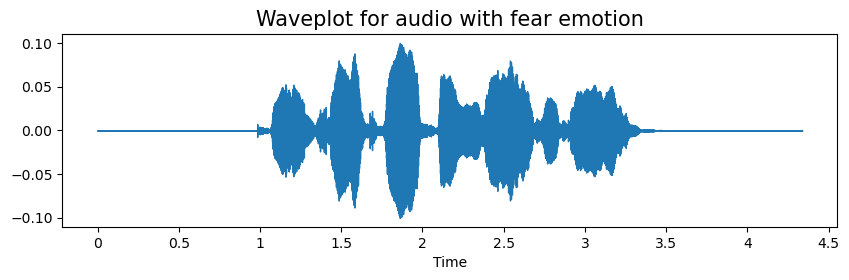

In [10]:
emotion='fear'
path = np.array(data_paths.Path[data_paths.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

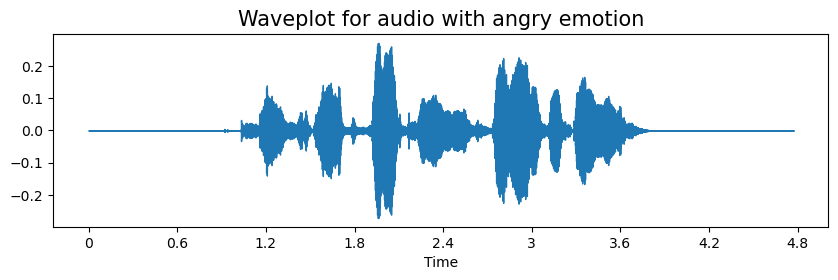

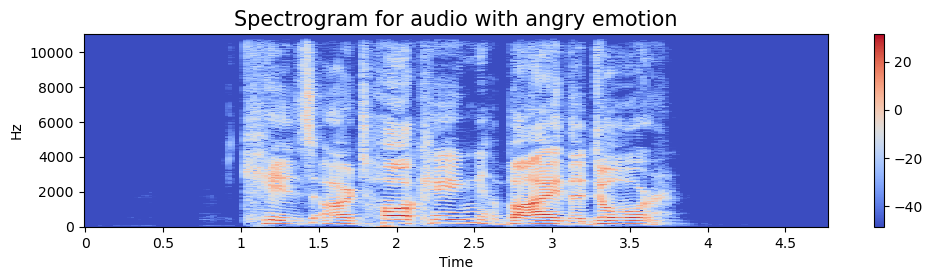

In [11]:
emotion='angry'
path = np.array(data_paths.Path[data_paths.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

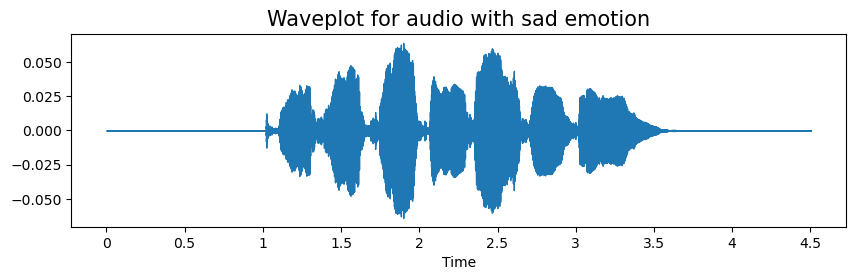

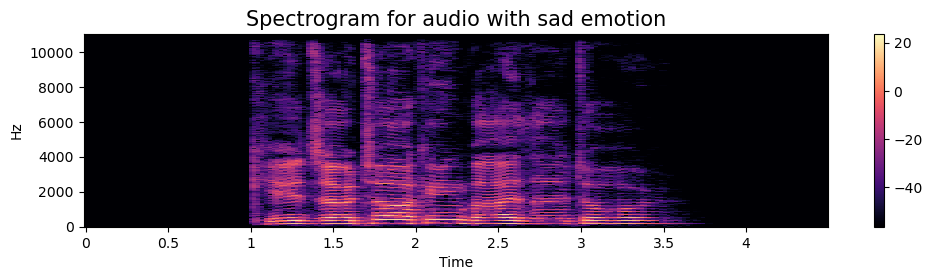

In [12]:
emotion='sad'
path = np.array(data_paths.Path[data_paths.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

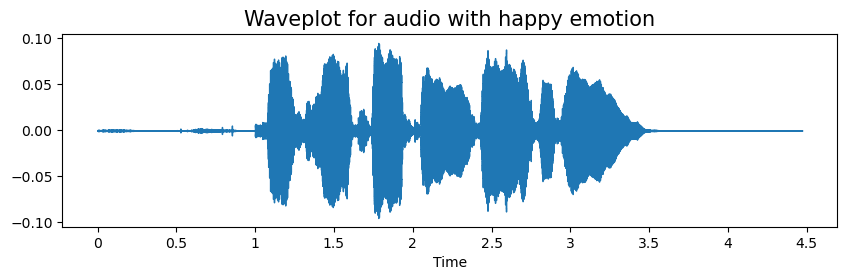

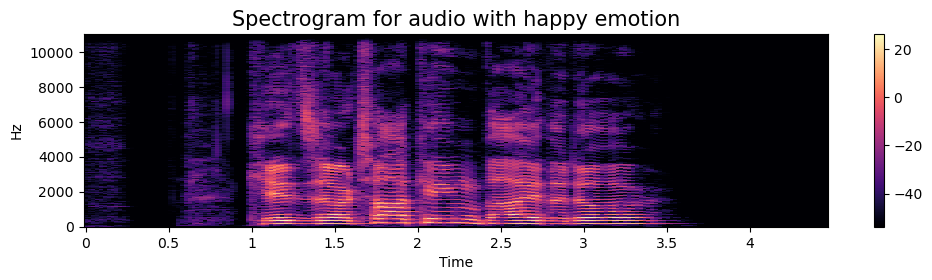

In [13]:
emotion='happy'
path = np.array(data_paths.Path[data_paths.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

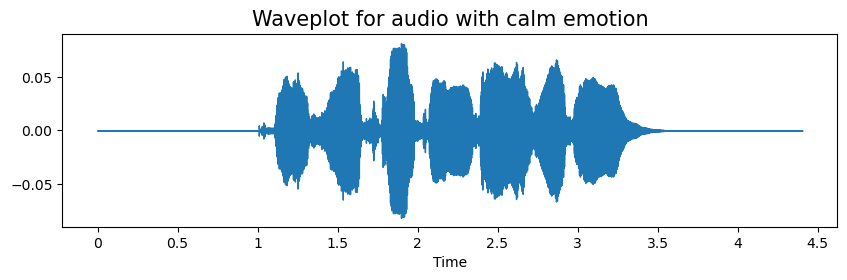

In [14]:
emotion='calm'
path = np.array(data_paths.Path[data_paths.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

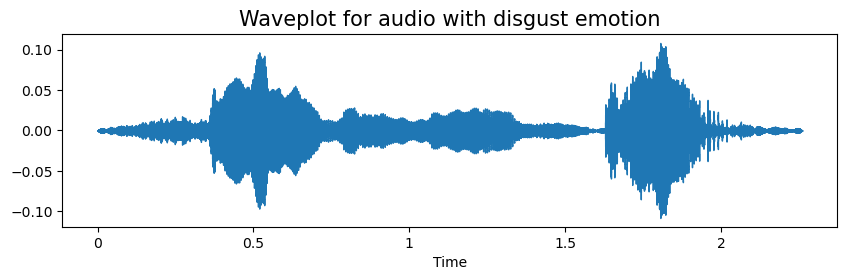

In [15]:
import os

emotion = 'disgust'
paths = np.array(data_paths.Path[data_paths.Emotions == emotion])
for path in paths:
    if os.path.exists(path):
        data, sampling_rate = librosa.load(path)
        create_waveplot(data, sampling_rate, emotion)
        create_spectrogram(data, sampling_rate, emotion)
        display(Audio(path))
        break  
else:
    print(f"No valid file found for emotion: {emotion}")


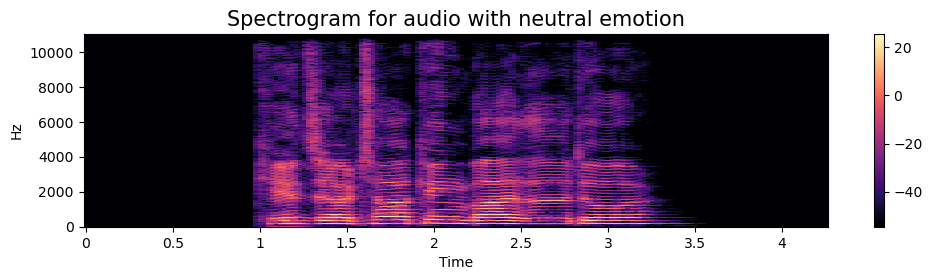

In [16]:
emotion='neutral'
path = np.array(data_paths.Path[data_paths.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

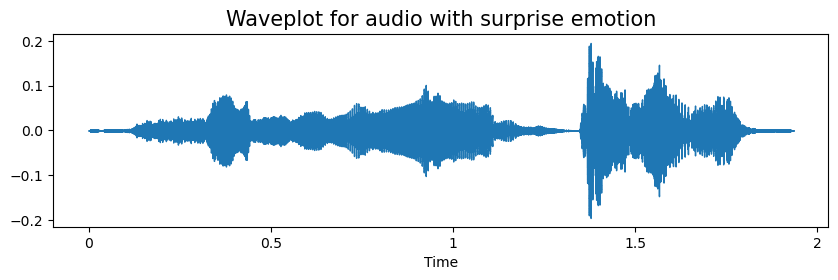

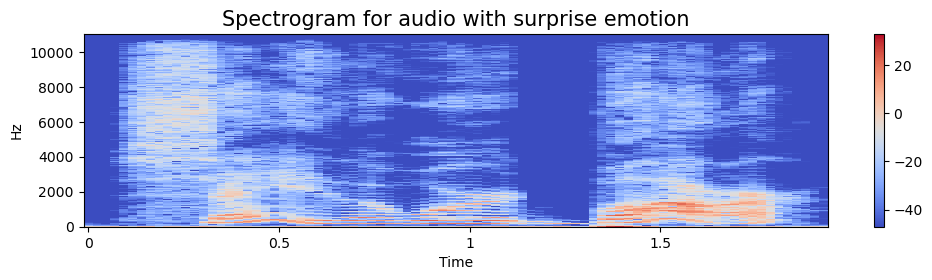

In [17]:

emotion='surprise'
path = np.array(data_paths.Path[data_paths.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [18]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_paths.Path)[1]
data, sample_rate = librosa.load(path)

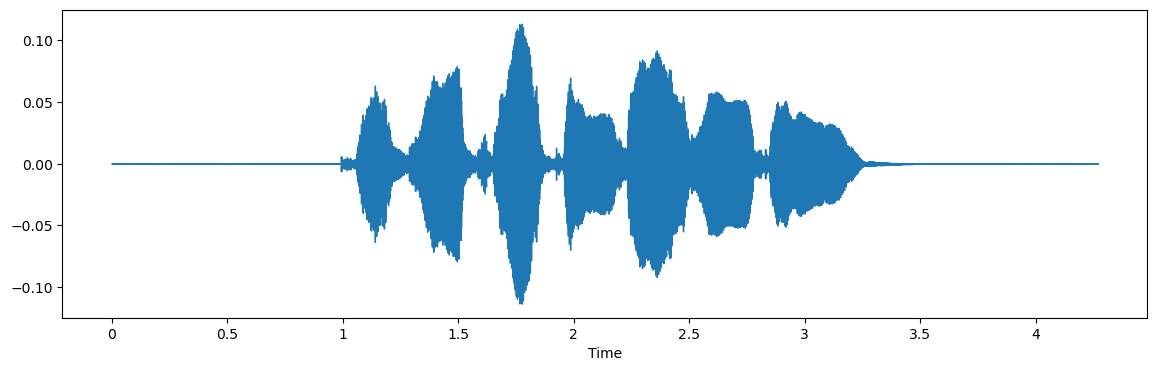

In [19]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Load your audio properly
path = np.array(data_paths.Path)[1]
data, sample_rate = librosa.load(path)

# Now plot and play
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
plt.show()

Audio(data, rate=sample_rate)


In [20]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [21]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

def stretch(data, rate=0.8):
    # Compute the STFT
    stft_data = librosa.stft(data)
    
    # Correct phase_vocoder call with keyword argument
    stft_stretch = librosa.phase_vocoder(stft_data, rate=rate)
    
    # Inverse STFT to get back waveform
    stretched_data = librosa.istft(stft_stretch)
    
    return stretched_data

# Usage
x = stretch(data, rate=0.8)

plt.figure(figsize=(14, 4))
librosa.display.waveshow(x, sr=sampling_rate)
plt.title('Stretched Audio')
plt.show()

Audio(x, rate=sampling_rate)


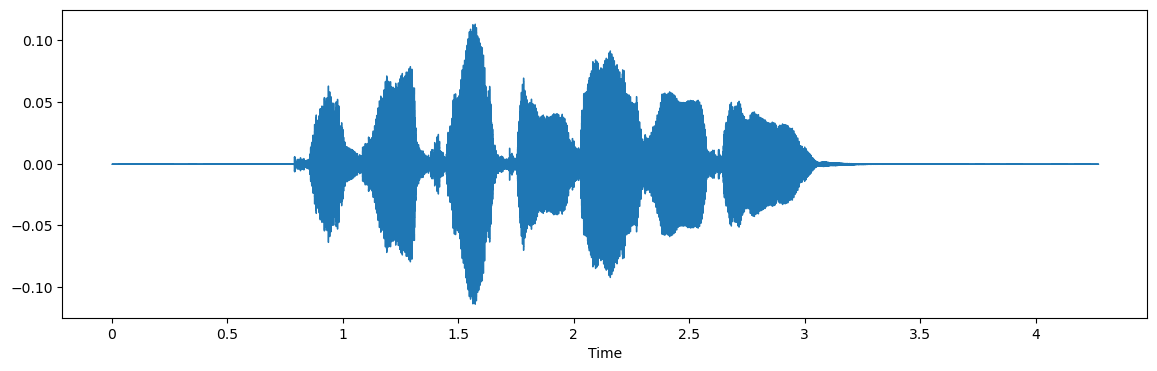

In [22]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


In [23]:
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)
x = pitch(data, sampling_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
plt.title('Pitch Shifted Audio')
plt.show()
Audio(x, rate=sampling_rate)


In [24]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# 1. Corrected path handling for CREMA-D
def fix_crema_paths(df):
    """Correct CREMA-D paths in the DataFrame to match actual file names"""
    crema_mask = df['Path'].str.contains('AudioWAV')
    
    def correct_crema_path(path):
        # Extract the base filename that matches your actual files
        # Example: converts "AudioWAV1005_IEO_ANG_MD.wav" to "1005_IEO_ANG_MD.wav"
        basename = os.path.basename(path)
        if basename.startswith('AudioWAV'):
            corrected_name = basename.replace('AudioWAV', '')
        else:
            corrected_name = basename
        
        # Construct the correct path
        return os.path.join(r"C:\Users\DELL\Downloads\cremad\AudioWAV", corrected_name)
    
    df.loc[crema_mask, 'Path'] = df.loc[crema_mask, 'Path'].apply(correct_crema_path)
    return df

# Apply the fix to your DataFrame
data_paths = fix_crema_paths(data_paths)

# 2. Enhanced feature extraction
def extract_features(data, sample_rate, n_mfcc=20):
    """Extract audio features from waveform data"""
    features = []
    
    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data))
    features.append(zcr)
    
    # Chroma STFT
    stft = np.abs(librosa.stft(data))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate), axis=1)
    features.extend(chroma)
    
    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=n_mfcc), axis=1)
    features.extend(mfcc)
    
    # RMS Energy
    rms = np.mean(librosa.feature.rms(y=data))
    features.append(rms)
    
    # Mel Spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate), axis=1)
    features.extend(mel)
    
    return np.array(features)

# 3. File processing with better path verification
def process_file(path, emotion):
    """Process a single audio file with improved path handling"""
    try:
        # First check with the exact path
        if not os.path.exists(path):
            # Try alternative path constructions
            basename = os.path.basename(path)
            
            # Case 1: Remove any 'AudioWAV' prefix if present
            if basename.startswith('AudioWAV'):
                alt_basename = basename.replace('AudioWAV', '')
                alt_path = os.path.join(os.path.dirname(path), alt_basename)
                if os.path.exists(alt_path):
                    path = alt_path
            
            # Case 2: Try the raw filename in the AudioWAV directory
            if not os.path.exists(path):
                alt_path = os.path.join(r"C:\Users\DELL\Downloads\cremad\AudioWAV", basename)
                if os.path.exists(alt_path):
                    path = alt_path
            
            # Final check
            if not os.path.exists(path):
                print(f"File not found (all attempts failed): {path}")
                return None
        
        # Load and process the audio file
        data, sr = librosa.load(path, duration=2.5, offset=0.6)
        features = extract_features(data, sr)
        
        return [features], [emotion]
    
    except Exception as e:
        print(f"Error processing {path}: {str(e)}")
        return None

# 4. Main processing loop
X, y = [], []
missing_files = 0
success_files = 0

for idx, row in tqdm(data_paths.iterrows(), total=len(data_paths)):
    result = process_file(row['Path'], row['Emotions'])
    if result is None:
        missing_files += 1
        continue
    
    features, labels = result
    X.extend(features)
    y.extend(labels)
    success_files += 1

# 5. Results summary
print("\n=== Processing Summary ===")
print(f"Total files: {len(data_paths)}")
print(f"Successfully processed: {success_files}")
print(f"Missing files: {missing_files}")

if len(X) > 0:
    X = np.array(X)
    y = np.array(y)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print("\n=== Results ===")
    print(f"Feature matrix shape: {X_scaled.shape}")
    print(f"Labels shape: {y.shape}")
else:
    print("\nError: No files processed successfully")

100%|██████████| 11734/11734 [11:16<00:00, 17.33it/s]



=== Processing Summary ===
Total files: 11734
Successfully processed: 11734
Missing files: 0

=== Results ===
Feature matrix shape: (11734, 162)
Labels shape: (11734,)


In [25]:
len(X), len(y), data_paths.Path.shape

(11734, 11734, (11734,))

In [26]:
Features = pd.DataFrame(X)
Features['labels'] = y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.166834  0.557366  0.440997  0.558011  0.562937  0.620579  0.680914   
1  0.175994  0.598417  0.450341  0.492107  0.510895  0.549417  0.690097   
2  0.109361  0.566228  0.478619  0.505367  0.551915  0.626280  0.629894   
3  0.177337  0.571117  0.459755  0.489422  0.536993  0.609088  0.680386   
4  0.168945  0.531660  0.429726  0.387635  0.481129  0.647104  0.689254   

          7         8         9  ...       153       154       155       156  \
0  0.560372  0.516539  0.430054  ...  0.000049  0.000030  0.000023  0.000027   
1  0.572404  0.608785  0.493504  ...  0.000051  0.000054  0.000033  0.000037   
2  0.544836  0.481995  0.409350  ...  0.000104  0.000092  0.000148  0.000213   
3  0.576038  0.550214  0.430558  ...  0.000049  0.000050  0.000048  0.000039   
4  0.496256  0.438375  0.488711  ...  0.000029  0.000023  0.000018  0.000019   

        157       158       159       160       161   labels  
0  0.000022  0.000023  0.000026  0.000018  0.000001  neutral  
1  0.000036  0.000042  0.000052  0.000024  0.000002  neutral  
2  0.000133  0.000133  0.000086  0.000040  0.000003  neutral  
3  0.000056  0.000056  0.000057  0.000040  0.000003  neutral  
4  0.000021  0.000036  0.000025  0.000013  0.000001     calm  

[5 rows x 163 columns]

In [27]:
#DATA AUGMENTATION 

In [28]:
X = Features.iloc[: ,:-1].values
y = Features['labels'].values

In [29]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()

In [30]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8800, 162), (8800, 8), (2934, 162), (2934, 8))

In [31]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8800, 162), (8800, 8), (2934, 162), (2934, 8))

In [32]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8800, 162, 1), (8800, 8), (2934, 162, 1), (2934, 8))

In [33]:
#modelling 

In [34]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,288 (2.13 MB)

 Trainable params: 557,288 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
import joblib

# Save the trained model
joblib.dump(model, 'emotion_model.joblib')

# Save the scaler you used for feature scaling
joblib.dump(scaler, 'scaler.joblib')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [36]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.2340 - loss: 1.9313 - val_accuracy: 0.3800 - val_loss: 1.5910 - learning_rate: 0.0010
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - accuracy: 0.3323 - loss: 1.6261 - val_accuracy: 0.4461 - val_loss: 1.4365 - learning_rate: 0.0010
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.4014 - loss: 1.4751 - val_accuracy: 0.4881 - val_loss: 1.2851 - learning_rate: 0.0010
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - accuracy: 0.4561 - loss: 1.3605 - val_accuracy: 0.5198 - val_loss: 1.2162 - learning_rate: 0.0010
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - accuracy: 0.4753 - loss: 1.3165 - val_accuracy: 0.5273 - val_loss: 1.1826 - learning_rate: 0.0010
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - accuracy: 0.4860 - loss: 1.2641 - val_accuracy: 0.5201 - val_loss: 1.2115 - learning_rate: 0.0010
Epoch 7/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.5

138/138 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.7693 - loss: 0.6036 - val_accuracy: 0.5876 - val_loss: 1.2548 - learning_rate: 0.0010
Epoch 45/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 109ms/step - accuracy: 0.7511 - loss: 0.6503 - val_accuracy: 0.5975 - val_loss: 1.2344 - learning_rate: 0.0010
Epoch 46/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 109ms/step - accuracy: 0.7574 - loss: 0.6246 - val_accuracy: 0.5934 - val_loss: 1.2838 - learning_rate: 0.0010
Epoch 47/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.7737 - loss: 0.5953 - val_accuracy: 0.5992 - val_loss: 1.2977 - learning_rate: 0.0010
Epoch 48/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.7700 - loss: 0.6020 - val_accuracy: 0.5842 - val_loss: 1.2919 - learning_rate: 0.0010
Epoch 49/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 19s 139ms/step - accuracy: 0.7900 - loss: 0.5620 - val_accuracy: 0.6022 - val_loss: 1.2982 - learning_rate: 0.0010
Epoch 50/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.7847 -

92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5887 - loss: 1.3287
Accuracy of our model on test data :  58.75937342643738 %


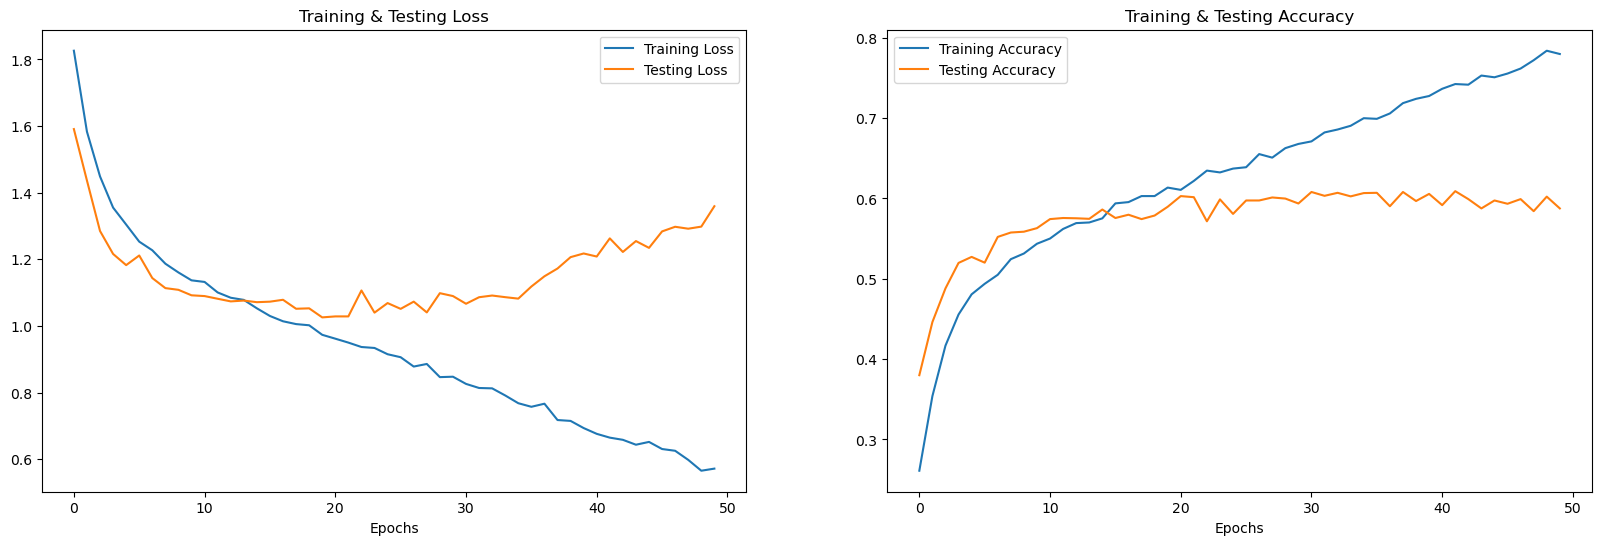

In [37]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [38]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


In [39]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0            happy       disgust
1          neutral       neutral
2         surprise         happy
3          neutral         angry
4              sad           sad
5          neutral       disgust
6            angry         angry
7              sad          fear
8             fear         happy
9              sad           sad

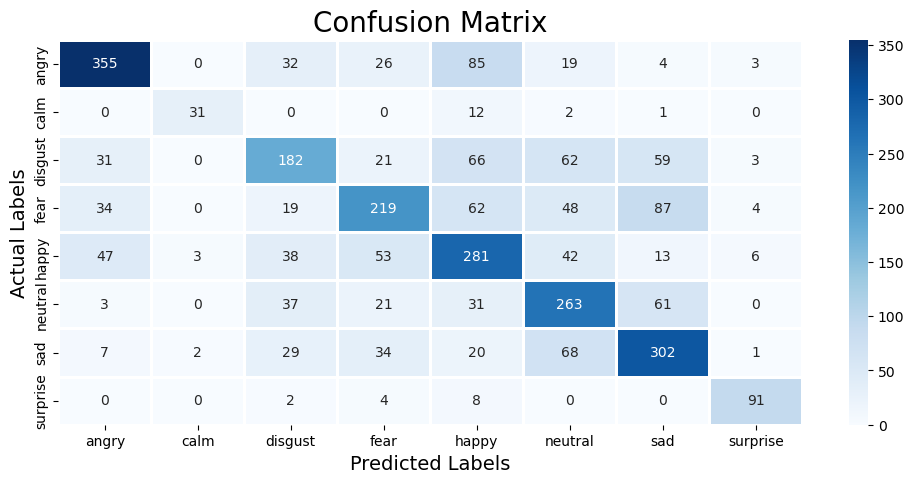

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 5))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.74      0.68      0.71       524
        calm       0.86      0.67      0.76        46
     disgust       0.54      0.43      0.48       424
        fear       0.58      0.46      0.51       473
       happy       0.50      0.58      0.54       483
     neutral       0.52      0.63      0.57       416
         sad       0.57      0.65      0.61       463
    surprise       0.84      0.87      0.85       105

    accuracy                           0.59      2934
   macro avg       0.64      0.62      0.63      2934
weighted avg       0.59      0.59      0.59      2934



In [42]:
pip install sounddevice ipywidgets librosa scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import numpy as np
import librosa
import sounddevice as sd
from IPython.display import display, clear_output
import ipywidgets as widgets
from sklearn.preprocessing import StandardScaler
import joblib
import threading
import queue
from collections import deque
import traceback
import matplotlib.pyplot as plt
import time

# Set up matplotlib for Jupyter
%matplotlib inline
plt.ioff()

# Constants
SAMPLE_RATE = 22050
CHUNK_DURATION = 0.1
BUFFER_DURATION = 10.0
CHANNELS = 1
BUFFER_SIZE = int(SAMPLE_RATE * BUFFER_DURATION)
CHUNK_SIZE = int(SAMPLE_RATE * CHUNK_DURATION)

# Configurations
MIN_CONFIDENCE = 0.15
SMOOTHING_WINDOW = 3
PLOT_PROBABILITIES = True
DEBUG_MODE = False
SILENCE_THRESHOLD = 0.02
VOICE_ACTIVITY_WINDOW = 10

# Initialize variables
stream = None
processing_thread = None
running = False
audio_buffer = None
processing_queue = None
emotion_history = None
last_voice_time = None

# Emotion labels
emotions = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise', 'calm']

# Load model and scaler
try:
    model = joblib.load('emotion_model.joblib')
    scaler = joblib.load('scaler.joblib')
    print("✅ Model loaded successfully")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    raise

# Create display widgets
emotion_display = widgets.HTML(value="<div style='font-size:18px;margin:5px'><b>Emotion:</b> Waiting...</div>")
graph_output = widgets.Output()
status_display = widgets.HTML(value="<div style='margin:5px'>Status: Ready</div>")

display(widgets.VBox([
    widgets.Label("Emotion Detection System"),
    emotion_display,
    graph_output,
    status_display
], layout=widgets.Layout(width='500px')))

def is_voice_active(audio_chunk):
    """Improved voice activity detection"""
    if len(audio_chunk) == 0:
        return False
    rms = librosa.feature.rms(y=audio_chunk)[0]
    return np.mean(rms) > SILENCE_THRESHOLD

def audio_callback(indata, frames, time_info, status):
    global last_voice_time
    if running:
        audio_chunk = indata[:, 0]
        audio_buffer.extend(audio_chunk)
        if is_voice_active(audio_chunk):
            last_voice_time = time.time()
        if len(audio_buffer) >= BUFFER_SIZE:
            processing_queue.put(np.array(list(audio_buffer)[-BUFFER_SIZE:]))

def extract_features(data, sample_rate):
    """Complete feature extraction that always returns valid features"""
    features = []
    
    # 1. Basic Temporal Features
    if len(data) > 0:
        features.append(np.mean(librosa.feature.zero_crossing_rate(y=data)))
        features.append(np.mean(librosa.feature.rms(y=data)))
    else:
        features.extend([0, 0])
    
    # 2. Spectral Features
    if len(data) > 0:
        stft = np.abs(librosa.stft(data, n_fft=2048, hop_length=512))
        
        # 3. Chroma Features (12)
        chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
        features.extend(np.mean(chroma, axis=1))
        
        # 4. MFCCs (20 coefficients + deltas + delta-deltas = 60)
        mfcc = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=20)
        features.extend(np.mean(mfcc, axis=1))
        features.extend(np.mean(librosa.feature.delta(mfcc), axis=1))
        features.extend(np.mean(librosa.feature.delta(mfcc, order=2), axis=1))
        
        # 5. Spectral Contrast (7)
        contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)
        features.extend(np.mean(contrast, axis=1))
        
        # 6. Tonnetz (6)
        tonnetz = librosa.feature.tonnetz(y=data, sr=sample_rate)
        features.extend(np.mean(tonnetz, axis=1))
        
        # 7. Spectral Characteristics
        features.append(np.mean(librosa.feature.spectral_centroid(y=data, sr=sample_rate)))
        features.append(np.mean(librosa.feature.spectral_bandwidth(y=data, sr=sample_rate)))
        features.append(np.mean(librosa.feature.spectral_rolloff(y=data, sr=sample_rate)))
        
        # 8. Harmonic Features
        y_harmonic = librosa.effects.harmonic(data)
        features.append(np.mean(y_harmonic))
        
        # 9. Pitch Features
        pitches, magnitudes = librosa.piptrack(y=data, sr=sample_rate)
        valid_pitches = pitches[magnitudes > np.median(magnitudes)] if len(magnitudes) > 0 else []
        features.append(np.mean(valid_pitches) if len(valid_pitches) > 0 else 0)
        features.append(np.std(valid_pitches) if len(valid_pitches) > 0 else 0)
    else:
        # If no audio data, fill with zeros
        features.extend([0] * (162 - len(features)))
    
    # Ensure we have exactly the number of features the scaler expects
    expected_features = scaler.n_features_in_ if hasattr(scaler, 'n_features_in_') else 162
    if len(features) < expected_features:
        features.extend([0] * (expected_features - len(features)))
    elif len(features) > expected_features:
        features = features[:expected_features]
    
    return np.array(features)

def plot_probabilities(probabilities, emotion):
    """Create and display probability graph"""
    with graph_output:
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(8, 3))
        
        colors = ['#3498db' for _ in probabilities]
        if emotion in emotions:
            colors[emotions.index(emotion)] = '#e74c3c'
        
        bars = ax.bar(emotions, probabilities, color=colors)
        ax.set_ylim(0, 1)
        ax.set_ylabel('Probability')
        ax.set_title('Emotion Probabilities')
        
        plt.xticks(rotation=45, ha='right')
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2f}',
                   ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        plt.close(fig)

def process_audio():
    global running, stream, last_voice_time
    
    last_voice_time = time.time()
    
    while running:
        try:
            # Check for silence timeout
            if time.time() - last_voice_time > VOICE_ACTIVITY_WINDOW:
                status_display.value = "<div style='margin:5px;color:orange'>Stopping (10s silence)...</div>"
                stop_listening()
                break
                
            # Process audio if available
            try:
                audio_data = processing_queue.get(timeout=0.5)
                features = extract_features(audio_data, SAMPLE_RATE)
                
                if len(features) == 0:
                    continue
                    
                features_scaled = scaler.transform([features])
                
                if hasattr(model, 'predict_proba'):
                    probabilities = model.predict_proba(features_scaled)[0]
                else:
                    probabilities = model.predict(features_scaled)[0]
                    probabilities = np.exp(probabilities) / np.sum(np.exp(probabilities))
                
                # Apply smoothing
                emotion_history.append(probabilities)
                smoothed_probs = np.mean(emotion_history, axis=0) if emotion_history else probabilities
                
                # Get top emotion
                top_idx = np.argmax(smoothed_probs)
                top_prob = smoothed_probs[top_idx]
                emotion = emotions[top_idx]
                
                # Update displays
                emotion_display.value = f"<div style='font-size:18px;margin:5px'><b>Emotion:</b> <span style='color:#e74c3c'>{emotion.upper()}</span> ({top_prob:.2f})</div>"
                plot_probabilities(smoothed_probs, emotion)
                status_display.value = f"<div style='margin:5px'>Active | Silence in: {VOICE_ACTIVITY_WINDOW - (time.time() - last_voice_time):.1f}s</div>"
                
            except queue.Empty:
                continue
                
        except Exception as e:
            status_display.value = f"<div style='margin:5px;color:red'>Error: {str(e)}</div>"
            traceback.print_exc()

def stop_listening():
    global running, stream
    running = False
    if stream is not None:
        stream.stop()
        stream.close()
        stream = None
    status_display.value = "<div style='margin:5px;color:green'>Stopped</div>"

# Create start button
start_button = widgets.Button(description="🎤 Start Listening", 
                            layout=widgets.Layout(width='150px'))

def start_listening(b):
    global running, stream, processing_thread, audio_buffer, processing_queue, emotion_history, last_voice_time
    
    # Initialize resources
    audio_buffer = deque(maxlen=BUFFER_SIZE)
    processing_queue = queue.Queue()
    emotion_history = deque(maxlen=SMOOTHING_WINDOW)
    last_voice_time = time.time()
    
    if stream is None and not running:
        running = True
        # Start processing thread
        processing_thread = threading.Thread(target=process_audio)
        processing_thread.start()
        
        # Start audio stream
        stream = sd.InputStream(callback=audio_callback,
                              channels=CHANNELS,
                              samplerate=SAMPLE_RATE,
                              blocksize=CHUNK_SIZE)
        stream.start()
        status_display.value = "<div style='margin:5px;color:blue'>Listening...</div>"

start_button.on_click(start_listening)
display(start_button)

print("System ready. Click to start - will auto-stop after 10s silence.")

✅ Model loaded successfully


Button(description='🎤 Start Listening', layout=Layout(width='150px'), style=ButtonStyle())

System ready. Click to start - will auto-stop after 10s silence.


In [48]:
%%writefile mic_web_app.py
import gradio as gr
import librosa
import numpy as np
import joblib

# Load model and scaler
model = joblib.load("emotion_model.joblib")
scaler = joblib.load("scaler.joblib")
emotions = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise', 'calm']

# Feature extraction (same as training)
def extract_features(data, sr):
    features = []
    
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data))
    features.append(zcr)

    stft = np.abs(librosa.stft(data))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr), axis=1)
    features.extend(chroma)

    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_mfcc=20), axis=1)
    features.extend(mfcc)

    rms = np.mean(librosa.feature.rms(y=data))
    features.append(rms)

    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr), axis=1)
    features.extend(mel)

    return np.array(features)

# Gradio function
def predict_emotion_from_mic(audio_path):
    try:
        data, sr = librosa.load(audio_path, duration=2.5, offset=0.6)
        features = extract_features(data, sr)

        # Scale and reshape
        features_scaled = scaler.transform([features])
        features_scaled = np.expand_dims(features_scaled, axis=2)

        # Predict
        prediction = model.predict(features_scaled)
        predicted_emotion = emotions[np.argmax(prediction)]

        return f"🎧 Detected Emotion: {predicted_emotion.upper()}"

    except Exception as e:
        return f"❌ Error: {str(e)}"

# Gradio Interface
interface = gr.Interface(
    fn=predict_emotion_from_mic,
    inputs=gr.Audio(source="microphone", type="filepath", label="🎤 Speak for 5 seconds"),
    outputs="text",
    title="🎙️ Speech Emotion Recognizer (Mic)",
    description="Speak into the mic. The model will predict your emotion based on the speech."
)

interface.launch()


Overwriting mic_web_app.py


In [49]:
!pip install gradio
!python mic_web_app.py



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
2025-05-18 20:53:06.937458: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-18 20:53:11.192229: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-18 20:53:18.911329: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the app

In [ ]:
import gradio as gr
import numpy as np
import librosa
import sounddevice as sd
from IPython.display import display
import ipywidgets as widgets
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt
import time
import os

# Constants
SAMPLE_RATE = 22050
RECORD_DURATION = 5  # seconds
CHUNK_SIZE = int(SAMPLE_RATE * 0.1)  # 100ms chunks

# Emotion labels
emotions = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise', 'calm']

# Load model and scaler
try:
    model = joblib.load('emotion_model.joblib')
    scaler = joblib.load('scaler.joblib')
    print("✅ Model loaded successfully")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    raise

def extract_features(data, sample_rate):
    """Feature extraction matching model's training features"""
    features = []
    
    # 1. Basic Temporal Features
    features.append(np.mean(librosa.feature.zero_crossing_rate(y=data)))
    features.append(np.mean(librosa.feature.rms(y=data)))
    
    # 2. Spectral Features
    stft = np.abs(librosa.stft(data, n_fft=2048, hop_length=512))
    
    # 3. Chroma Features (12)
    chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
    features.extend(np.mean(chroma, axis=1))
    
    # 4. MFCCs (20 coefficients + deltas + delta-deltas = 60)
    mfcc = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=20)
    features.extend(np.mean(mfcc, axis=1))
    features.extend(np.mean(librosa.feature.delta(mfcc), axis=1))
    features.extend(np.mean(librosa.feature.delta(mfcc, order=2), axis=1))
    
    # 5. Spectral Contrast (7)
    contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)
    features.extend(np.mean(contrast, axis=1))
    
    # 6. Tonnetz (6)
    tonnetz = librosa.feature.tonnetz(y=data, sr=sample_rate)
    features.extend(np.mean(tonnetz, axis=1))
    
    # Ensure we have exactly the number of features the scaler expects
    expected_features = scaler.n_features_in_ if hasattr(scaler, 'n_features_in_') else 162
    if len(features) < expected_features:
        features.extend([0] * (expected_features - len(features)))
    elif len(features) > expected_features:
        features = features[:expected_features]
    
    return np.array(features)

def record_audio(duration=RECORD_DURATION):
    """Record audio from microphone"""
    print(f"Recording for {duration} seconds...")
    audio = sd.rec(int(duration * SAMPLE_RATE), samplerate=SAMPLE_RATE, channels=1)
    sd.wait()  # Wait until recording is finished
    return audio.flatten()

def predict_emotion(audio_path=None, use_mic=False):
    """Predict emotion from audio file or microphone input"""
    try:
        if use_mic:
            audio_data = record_audio()
            sample_rate = SAMPLE_RATE
        else:
            if audio_path is None:
                return "No audio provided", None
            audio_data, sample_rate = librosa.load(audio_path, sr=SAMPLE_RATE)
        
        # Extract features
        features = extract_features(audio_data, sample_rate)
        features_scaled = scaler.transform([features])
        
        # Predict probabilities
        if hasattr(model, 'predict_proba'):
            probabilities = model.predict_proba(features_scaled)[0]
        else:
            probabilities = model.predict(features_scaled)[0]
            probabilities = np.exp(probabilities) / np.sum(np.exp(probabilities))
        
        # Get top emotion
        top_idx = np.argmax(probabilities)
        top_prob = probabilities[top_idx]
        emotion = emotions[top_idx]
        
        # Create plot
        fig, ax = plt.subplots(figsize=(10, 4))
        colors = ['#3498db' for _ in probabilities]
        colors[top_idx] = '#e74c3c'
        
        bars = ax.bar(emotions, probabilities, color=colors)
        ax.set_ylim(0, 1)
        ax.set_ylabel('Probability')
        ax.set_title('Emotion Probabilities')
        
        plt.xticks(rotation=45, ha='right')
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2f}',
                   ha='center', va='bottom')
        
        plt.tight_layout()
        
        return f"Detected emotion: {emotion} (confidence: {top_prob:.2f})", fig
    
    except Exception as e:
        return f"Error: {str(e)}", None

# Create Gradio interface
with gr.Blocks(title="Emotion Detection") as demo:
    gr.Markdown("# 🎤 Emotion Detection from Speech")
    gr.Markdown("Upload an audio file or record live to detect the emotional state.")
    
    with gr.Tabs():
        with gr.TabItem("Upload Audio File"):
            file_input = gr.Audio(type="filepath", label="Upload Audio File")
            file_output_text = gr.Textbox(label="Result")
            file_output_plot = gr.Plot(label="Probabilities")
            file_button = gr.Button("Analyze")
        
        with gr.TabItem("Record Live"):
            mic_output_text = gr.Textbox(label="Result")
            mic_output_plot = gr.Plot(label="Probabilities")
            mic_button = gr.Button("Record & Analyze (5 seconds)")
    
    # Define button actions
    file_button.click(
        predict_emotion,
        inputs=[file_input, gr.Number(0, visible=False)],
        outputs=[file_output_text, file_output_plot]
    )
    
    mic_button.click(
        predict_emotion,
        inputs=[gr.Audio(None, visible=False), gr.Number(1, visible=False)],
        outputs=[mic_output_text, mic_output_plot]
    )

# Launch the interface
demo.launch(debug=True)

✅ Model loaded successfully
* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
